Chapter 06

# 不等式
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用Matplotlib库绘制了多个三维曲面图、掩码图和二维等高线图，以展示不同不等式区域的几何形状和位置。通过定义不同的不等式函数，代码在$(x_1, x_2)$平面上创建了多个区域并绘制出相应的图形。代码结构主要包括三个自定义函数$plot\_3D\_f\_xy$、$plot\_3D\_mask$和$plot\_2D\_contour$，分别绘制三维函数曲面、掩码图和二维等高线图：

1. **定义三维网格**：
   - 生成$x$和$y$从$-4$到$4$的均匀网格数据，并创建网格矩阵$xx$和$yy$，为绘制各个不等式的曲面和区域提供坐标。

2. **绘制不同的不等式区域**：
   - 代码通过设定不同的函数$zz$来定义各不等式，并将其转化为布尔掩码，标记满足不等式的区域。每个不等式的表达式如下：
     - $ x_1 + 1 > 0 \Rightarrow zz = -x_1 - 1 $
     - $ -1 < x_1 < 2 \Rightarrow zz = |x_1 - 0.5| - 1.5 $
     - $ x_2 < 0 \text{ or } x_2 > 2 \Rightarrow zz = -|x_2 - 1| + 1 $
     - $ x_1 - x_2 + 1 < 0 \Rightarrow zz = x_1 - x_2 + 1 $
     - $ x_1 > 2 \cdot x_2 \Rightarrow zz = -x_1 + 2 \cdot x_2 $
     - $ |x_1 + x_2| < 1 \Rightarrow zz = |x_1 + x_2| - 1 $
     - $ |x_1| + |x_2| < 2 \Rightarrow zz = |x_1| + |x_2| - 2 $
     - $ x_1^2 + x_2^2 < 4 \Rightarrow zz = x_1^2 + x_2^2 - 4 $

3. **调用绘图函数**：
   - 对于每个不等式区域，分别调用$plot\_3D\_f\_xy$绘制三维曲面图，$plot\_3D\_mask$绘制掩码图以标记区域，$plot\_2D\_contour$绘制二维等高线图。每个图形清晰展示了不等式在$(x_1, x_2)$平面上的几何特性和边界。

4. **决策边界的绘制**：
   - 在每个图中通过设置$zz=0$的等高线（即决策边界）来标记不等式区域的边界。决策边界在图形中以黑色线条表示，分隔满足和不满足不等式的区域。

通过这些步骤，代码生成了多个不等式的三维和二维图形，帮助理解不同不等式在二维平面上的几何含义。每个不等式的区域特性通过图形的形状和掩码的颜色清晰地展示出来，方便观察不同约束下的几何分布。

## 导入所需库

In [1]:
import math  # 导入math库，用于数学计算
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
from matplotlib.colors import ListedColormap  # 导入ListedColormap，用于定义自定义颜色映射

## 自定义函数 - 绘制三维曲面图

In [2]:
def plot_3D_f_xy(xx, yy, zz):  # 绘制三维曲面图，展示函数f(x1, x2)的三维轮廓
    fig = plt.figure(figsize=(8, 8))  # 创建图形，大小为8x8英寸
    ax = plt.axes(projection='3d')  # 创建三维坐标轴

    ax.plot_wireframe(xx, yy, zz, color=[0.75, 0.75, 0.75], cmap='RdYlBu_r', rstride=20, cstride=20, linewidth=0.25)  # 绘制曲面网格

    l_max = max(np.max(zz), -np.min(zz))  # 计算zz数据的最大绝对值
    levels = np.linspace(-l_max, l_max, 21)  # 定义等高线的层级

    ax.contour(xx, yy, zz, levels=levels, cmap='RdYlBu_r')  # 绘制三维等高线图

    ax.contour(xx, yy, zz, levels=[0], colors=['k'])  # 绘制决策边界

    ax.set_proj_type('ortho')  # 设置投影类型为正交投影
    ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
    ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围

    plt.tight_layout()  # 自动调整布局
    ax.set_xlabel('$x_1$')  # 设置x轴标签
    ax.set_ylabel('$x_2$')  # 设置y轴标签
    ax.set_zlabel('f($x_1$,$x_2$)')  # 设置z轴标签
    ax.view_init(azim=-120, elev=30)  # 设置视角
    ax.grid(False)  # 关闭网格

## 自定义函数 - 绘制三维掩码图

In [3]:
def plot_3D_mask(xx, yy, mask):  # 绘制三维掩码图，展示二元掩码数据的三维结构
    fig = plt.figure(figsize=(8, 8))  # 创建图形，大小为8x8英寸
    ax = plt.axes(projection='3d')  # 创建三维坐标轴

    ax.plot_wireframe(xx, yy, mask, cmap='RdYlBu_r', rstride=20, cstride=20, linewidth=0.25)  # 绘制掩码网格

    ax.set_proj_type('ortho')  # 设置投影类型为正交投影
    ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
    ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
    ax.set_zlim(0, 1.2)  # 设置z轴范围为0到1.2

    plt.tight_layout()  # 自动调整布局
    ax.set_xlabel('$x_1$')  # 设置x轴标签
    ax.set_ylabel('$x_2$')  # 设置y轴标签
    ax.set_zlabel('[0,1]')  # 设置z轴标签
    ax.set_zticks([0, 1])  # 设置z轴刻度
    ax.view_init(azim=-120, elev=30)  # 设置视角
    ax.grid(False)  # 关闭网格

## 自定义函数 - 绘制二维等高线图

In [4]:
def plot_2D_contour(xx, yy, zz, mask):  # 绘制二维等高线图，展示掩码数据的二维轮廓
    rgb = [[255, 238, 255], [219, 238, 244]]  # 自定义颜色，红色和蓝色
    rgb = np.array(rgb) / 255.  # 归一化RGB值
    cmap_light = ListedColormap(rgb)  # 创建颜色映射

    fig, ax = plt.subplots(figsize=(8, 8))  # 创建图形，大小为8x8英寸
    l_max = max(np.max(zz), -np.min(zz))  # 计算zz数据的最大绝对值
    levels = np.linspace(-l_max, l_max, 21)  # 定义等高线层级
    plt.contourf(xx, yy, mask, cmap=cmap_light)  # 绘制掩码数据的填充等高线图
    plt.contour(xx, yy, zz, levels=levels, cmap='RdYlBu_r')  # 绘制zz数据的等高线图

    plt.contour(xx, yy, zz, levels=[0], colors=['k'])  # 绘制决策边界

    plt.xlim(xx.min(), xx.max())  # 设置x轴范围
    plt.ylim(yy.min(), yy.max())  # 设置y轴范围
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格
    plt.xlabel('$x_1$')  # 设置x轴标签
    plt.ylabel('$x_2$')  # 设置y轴标签

## 定义网格数据

In [5]:
num = 500  # 设置网格分辨率
x = np.linspace(-4, 4, num)  # 生成x轴数据
y = np.linspace(-4, 4, num)  # 生成y轴数据
xx, yy = np.meshgrid(x, y)  # 创建x和y的网格数据

## 绘制不同的不等式区域

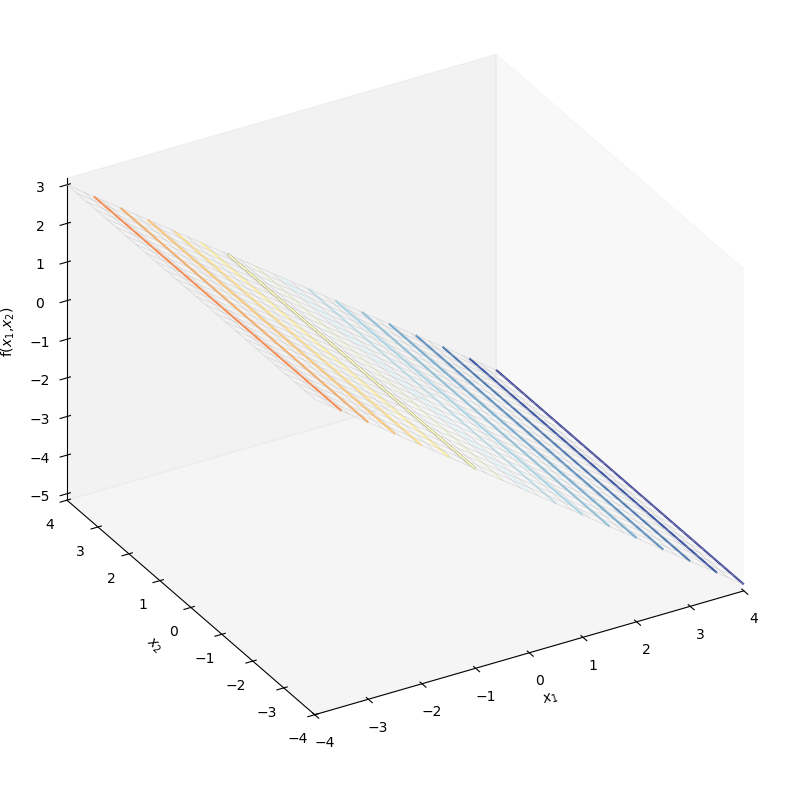

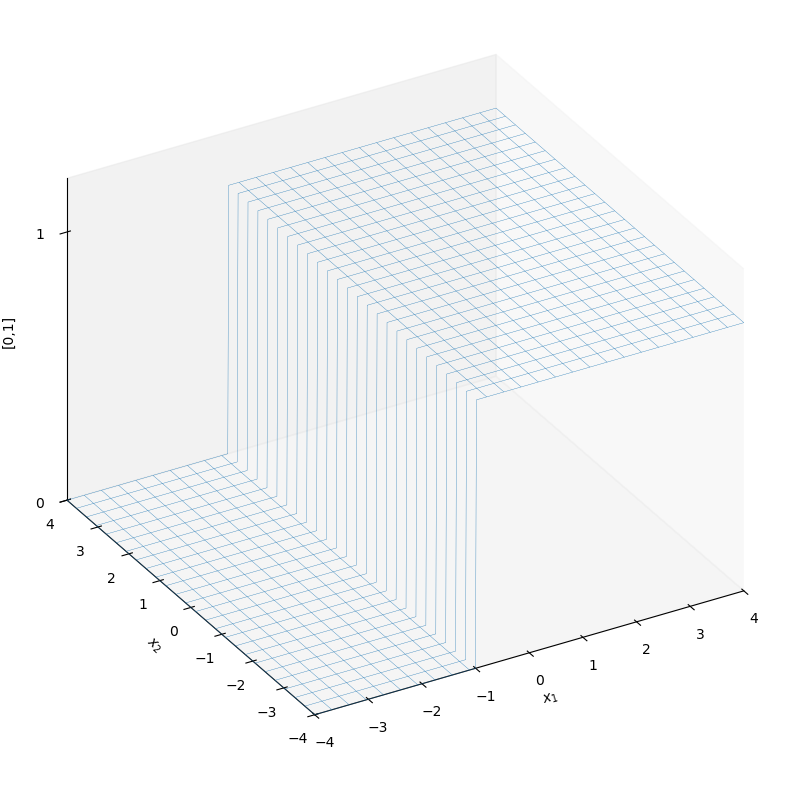

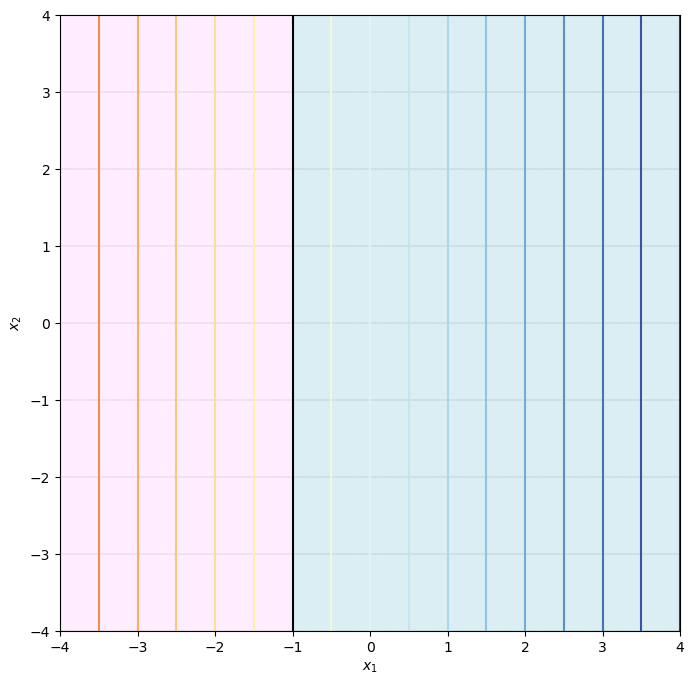

In [6]:
zz = -xx - 1  # 定义不等式区域x1 + 1 > 0的函数
mask_less_than_0 = (zz < 0) + 0  # 创建掩码，用于标记满足不等式的区域
plot_3D_f_xy(xx, yy, zz)  # 绘制三维曲面图
plot_3D_mask(xx, yy, mask_less_than_0)  # 绘制三维掩码图
plot_2D_contour(xx, yy, zz, mask_less_than_0)  # 绘制二维等高线图

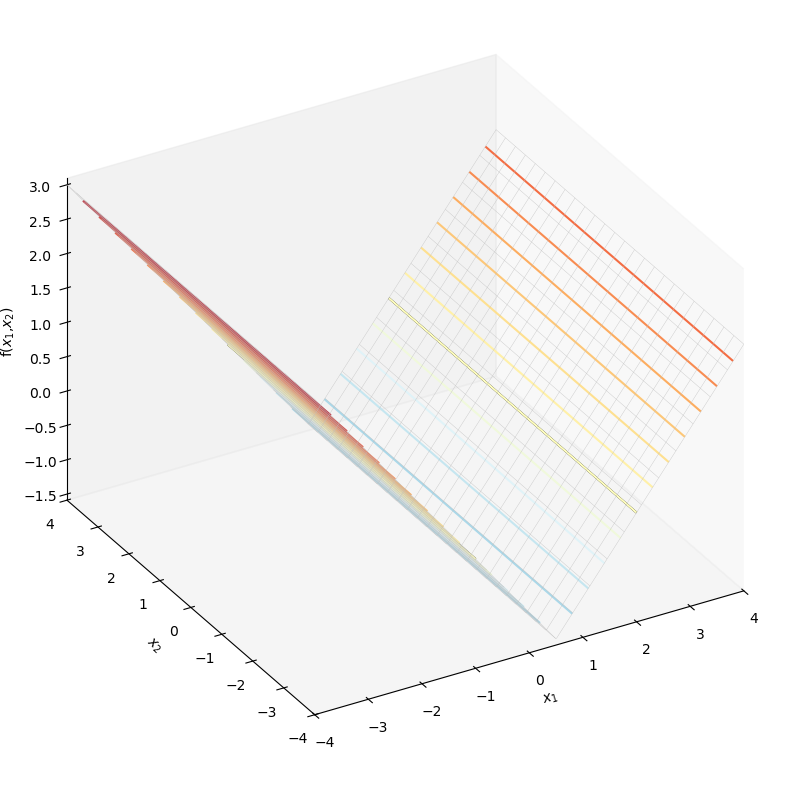

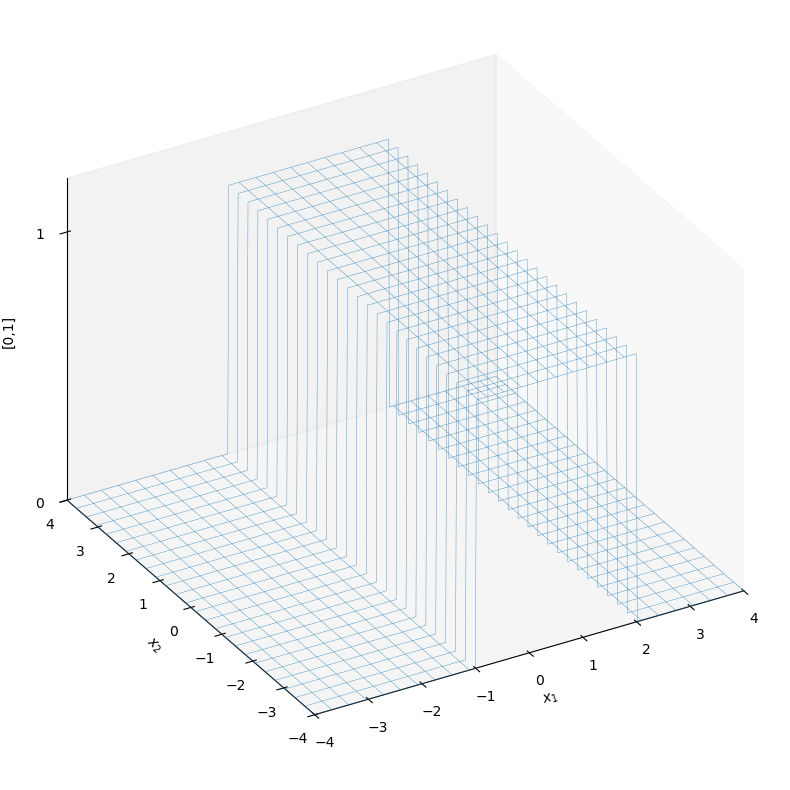

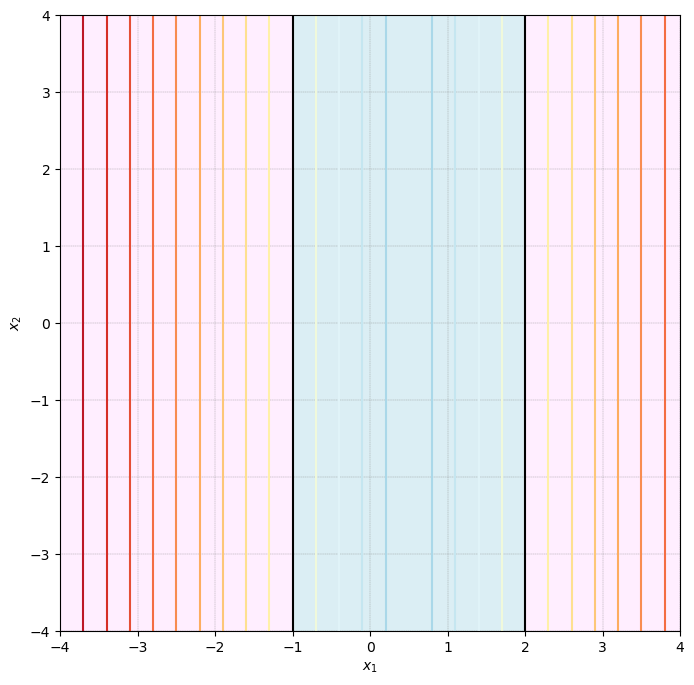

In [7]:
# 其他不等式区域的定义和绘制
zz = np.abs(xx - 0.5) - 1.5  # 定义不等式区域-1 < x1 < 2
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

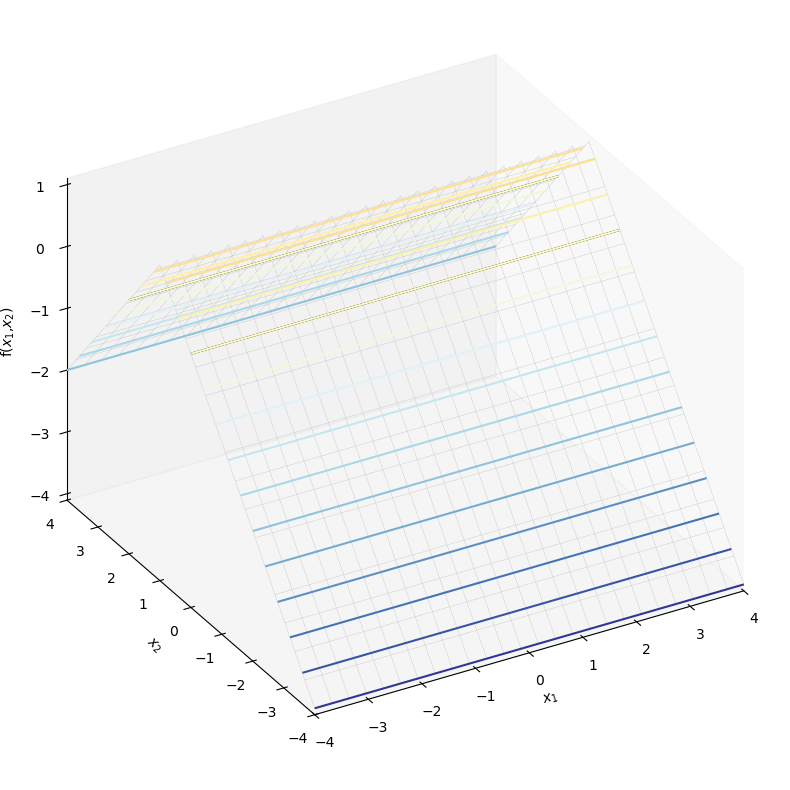

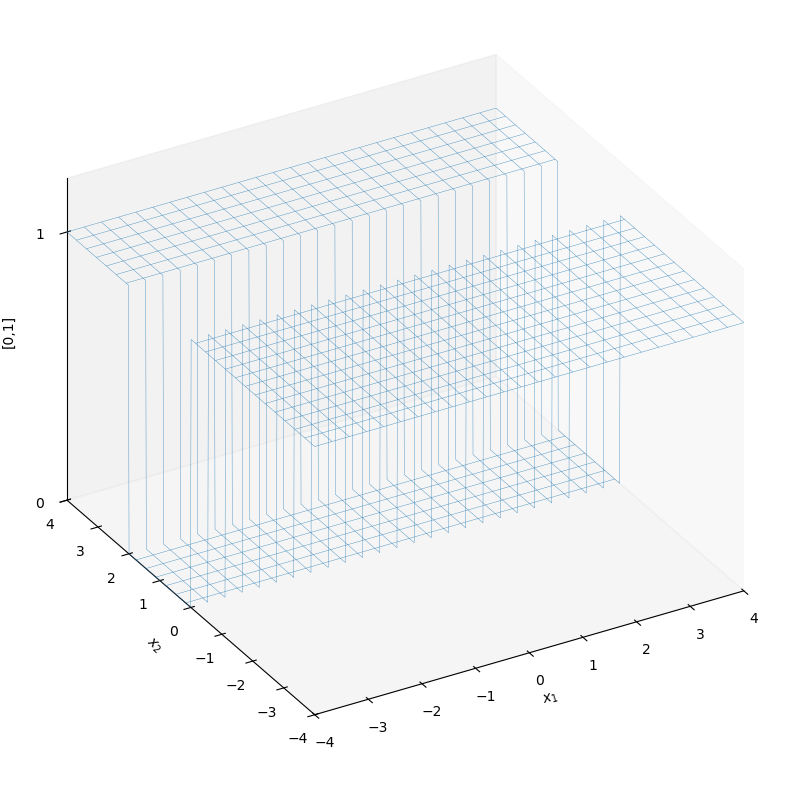

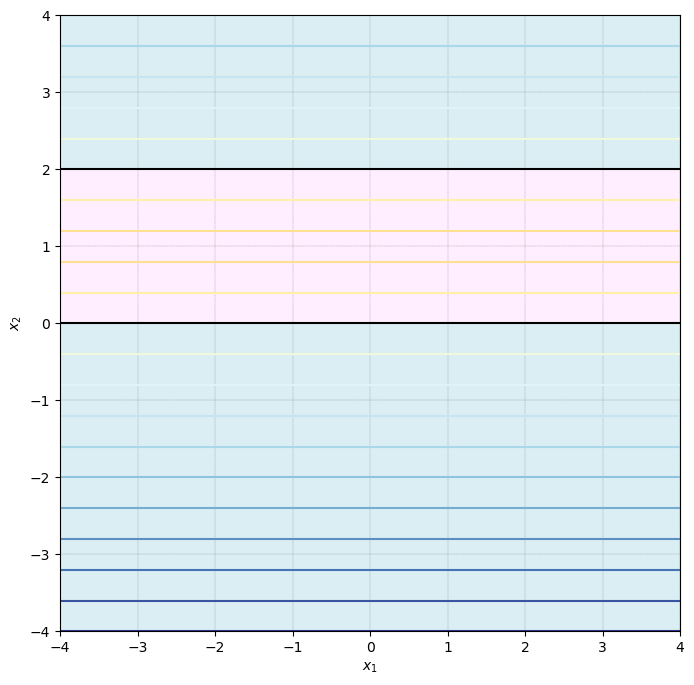

In [8]:
zz = -np.abs(yy - 1) + 1  # 定义不等式区域x2 < 0或x2 > 2
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

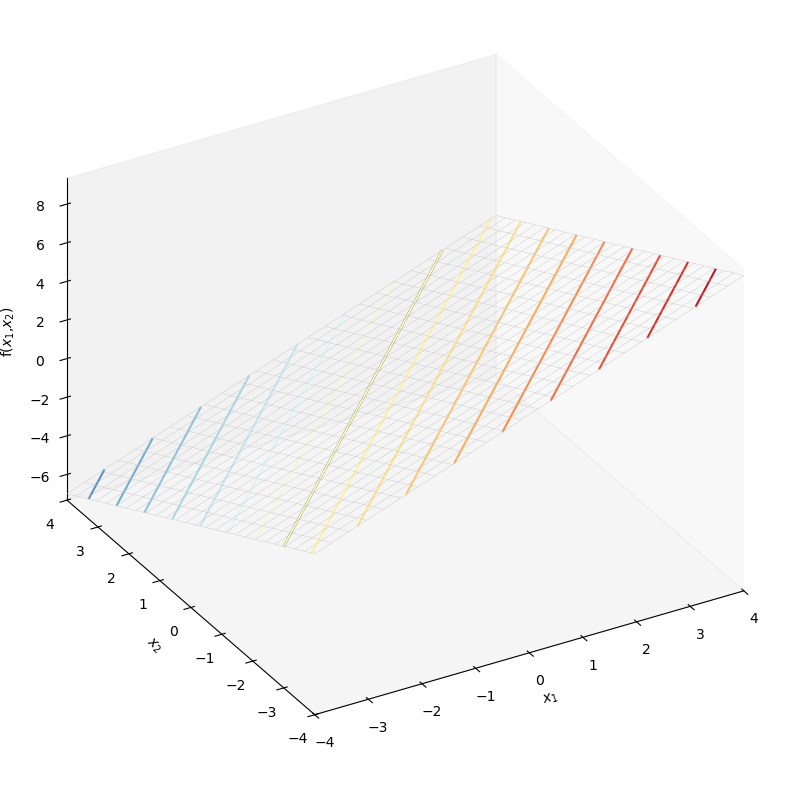

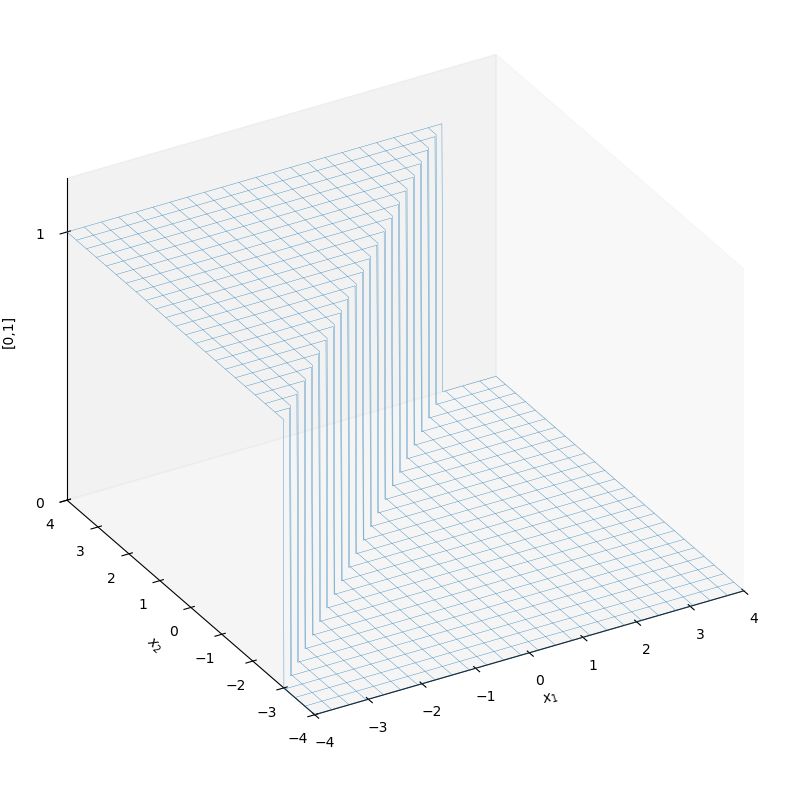

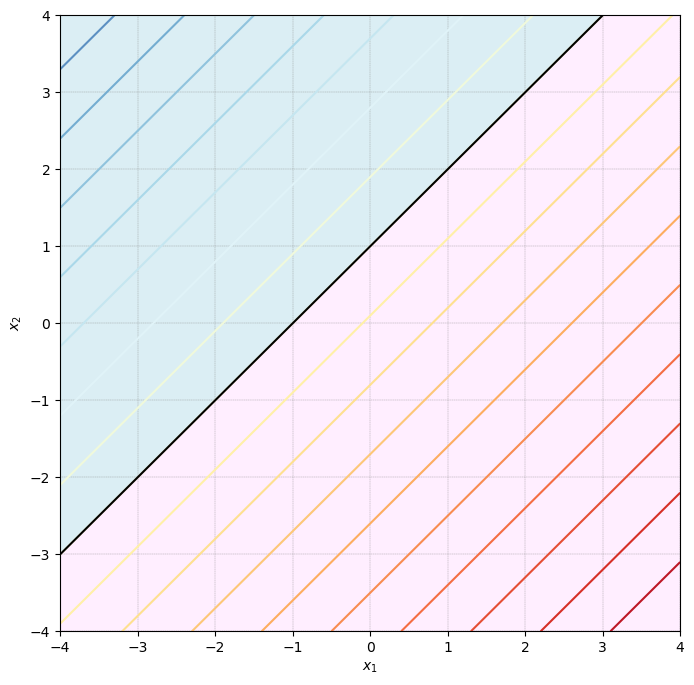

In [9]:
zz = xx - yy + 1  # 定义不等式区域x1 - x2 + 1 < 0
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

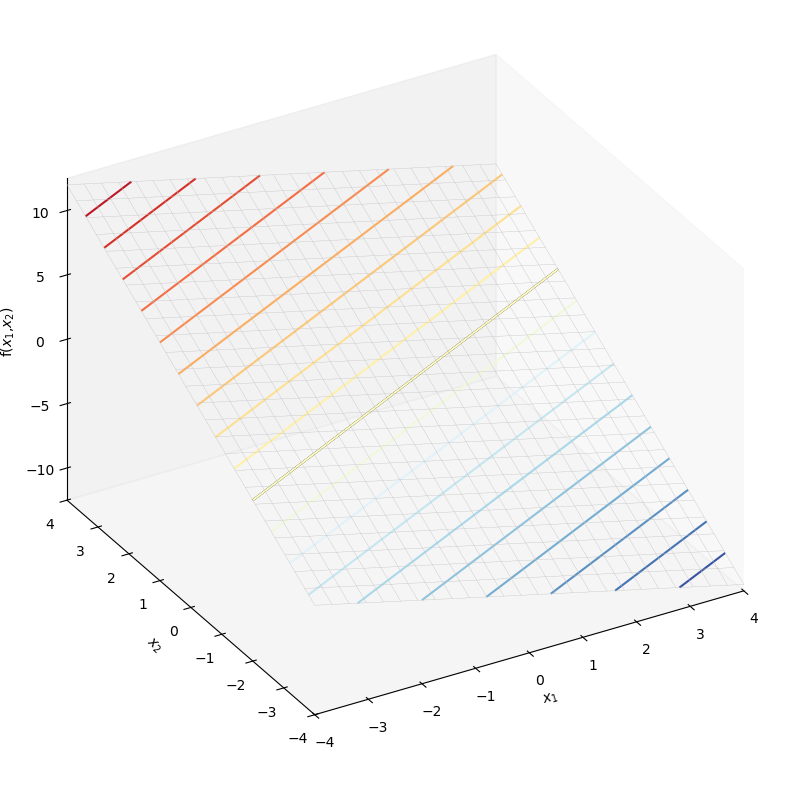

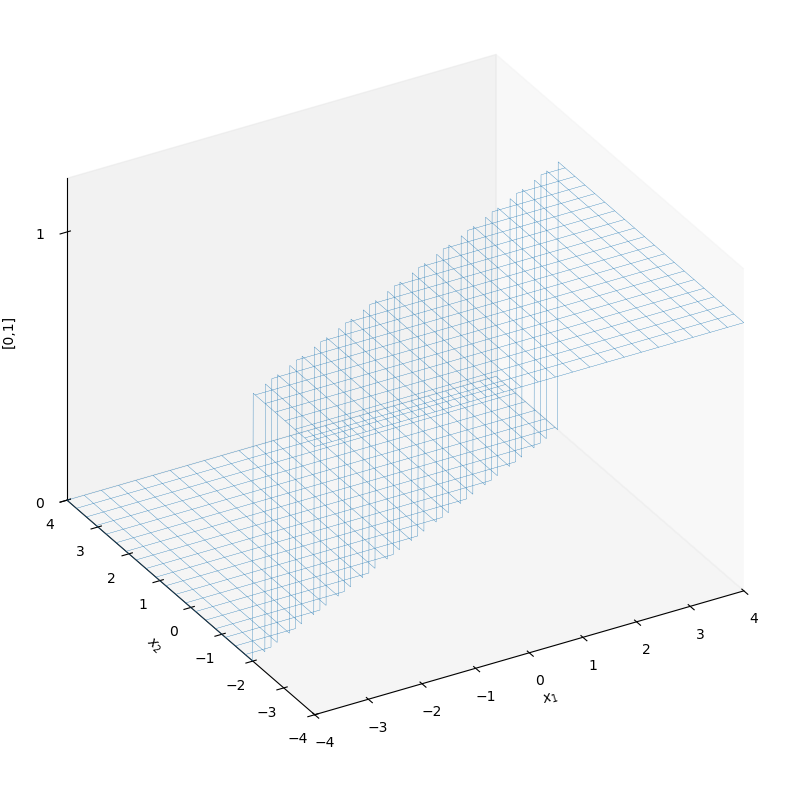

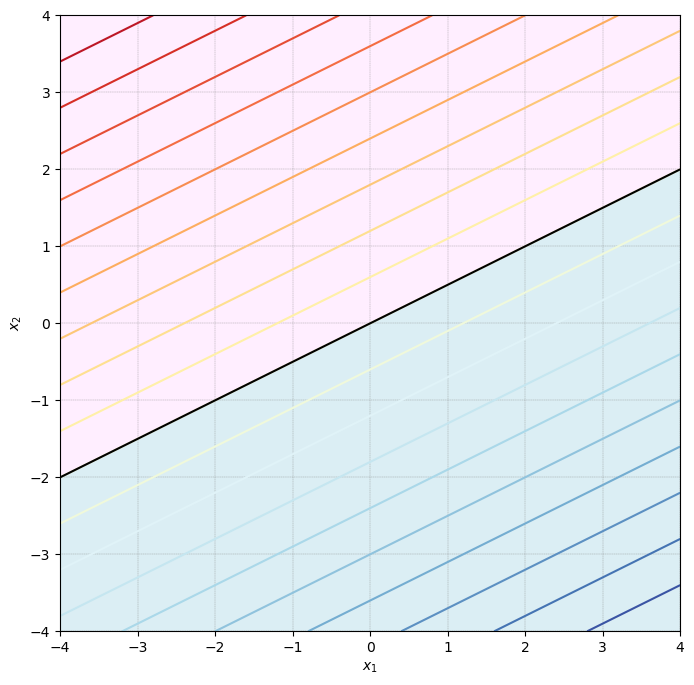

In [10]:
zz = - xx + 2 * yy  # 定义不等式区域x1 > 2*x2
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

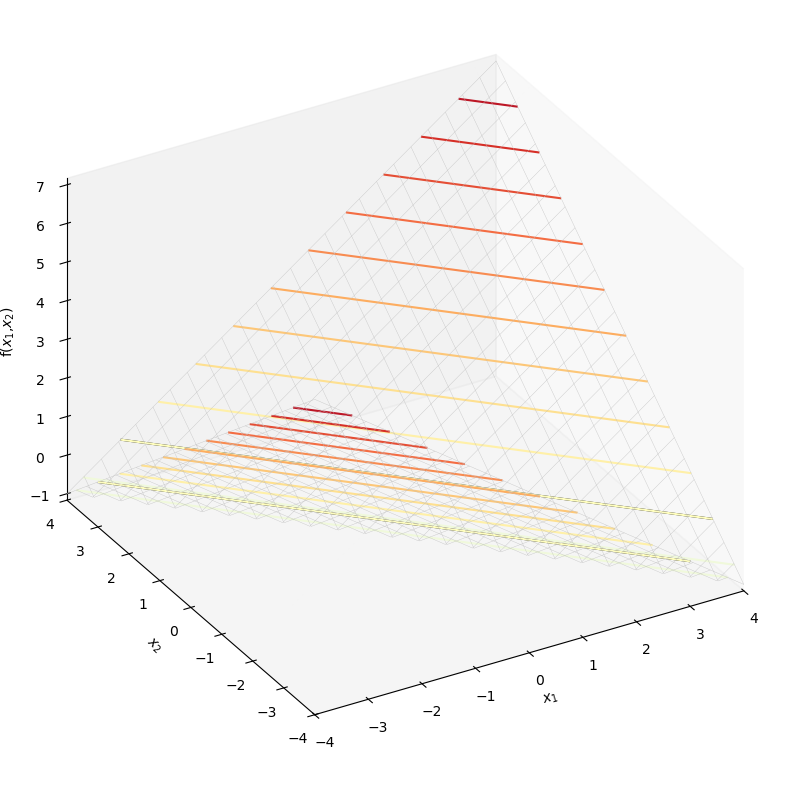

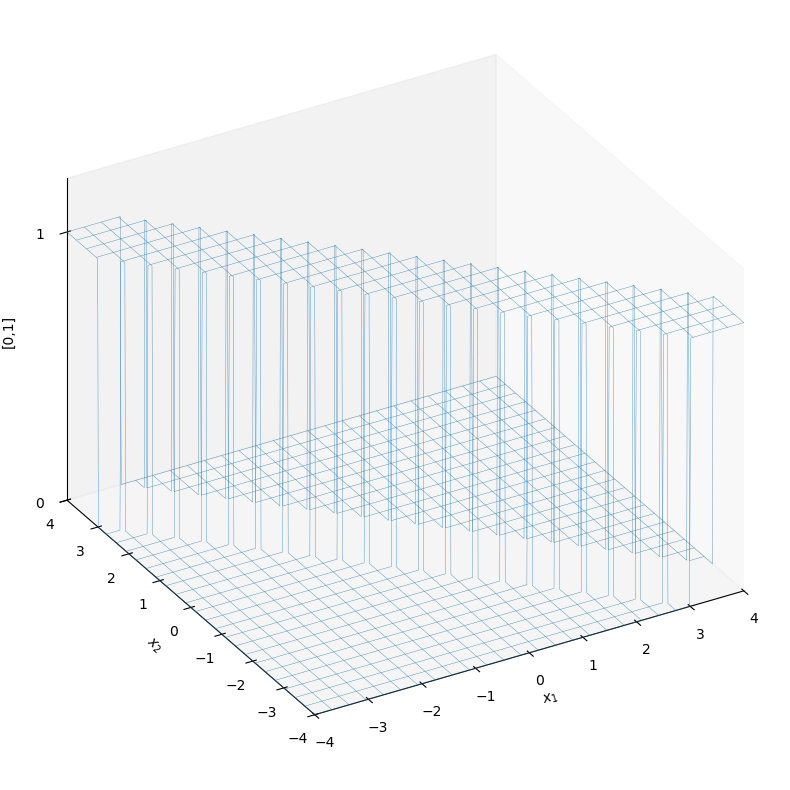

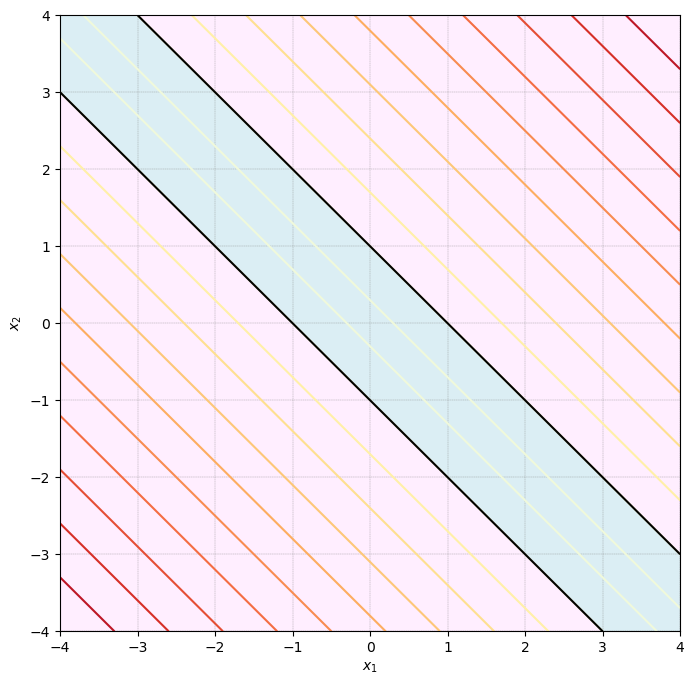

In [11]:
zz = np.abs(xx + yy) - 1  # 定义不等式区域|x1 + x2| < 1
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

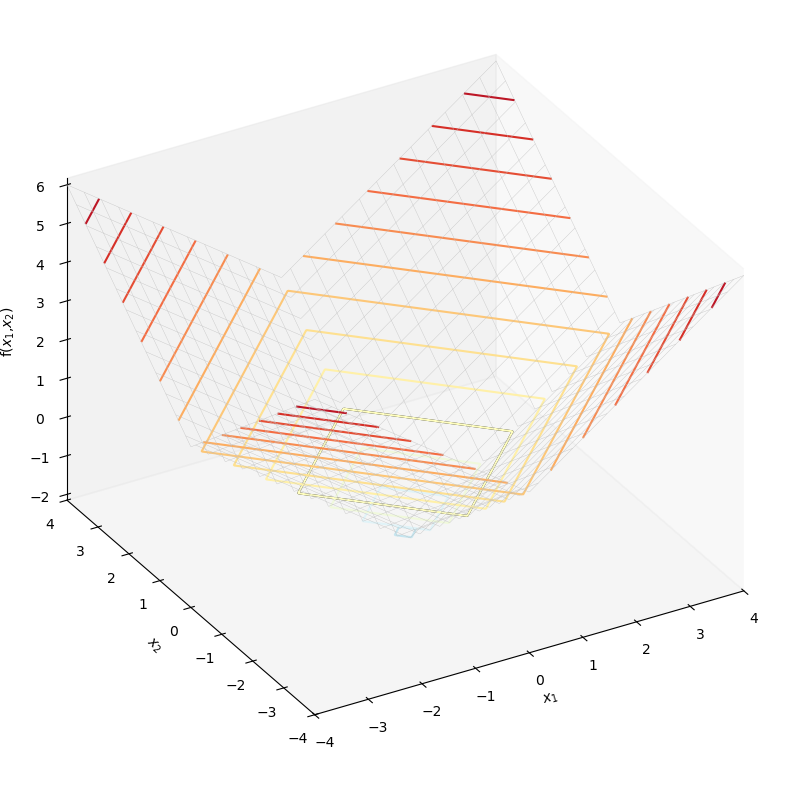

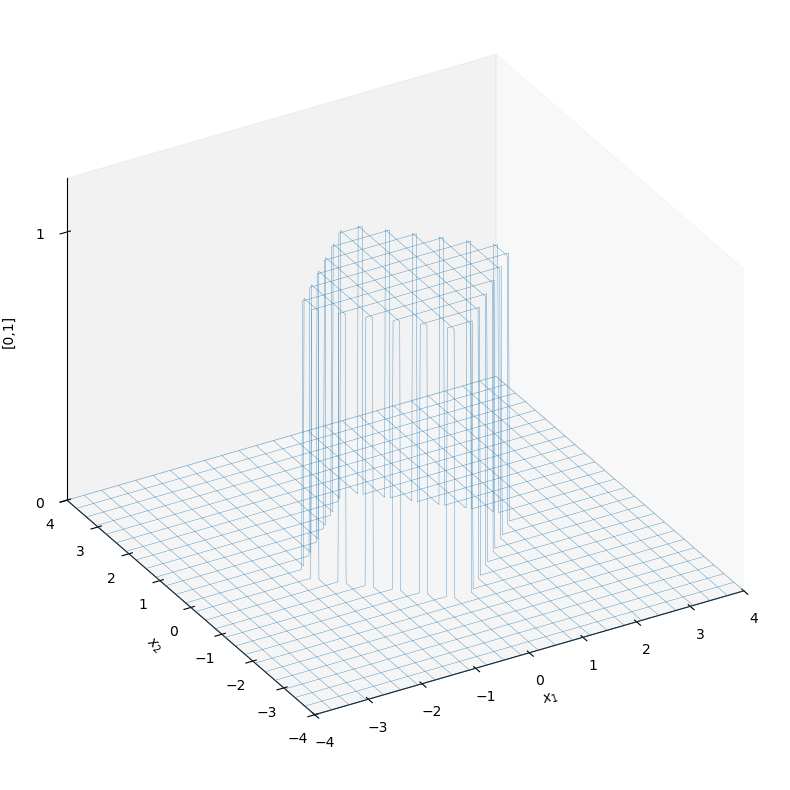

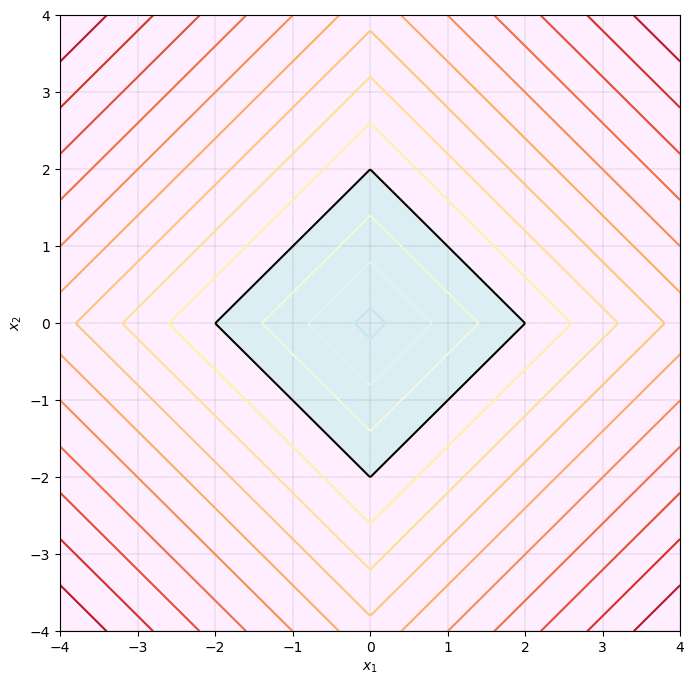

In [12]:
zz = np.abs(xx) + np.abs(yy) - 2  # 定义不等式区域|x1| + |x2| < 2
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

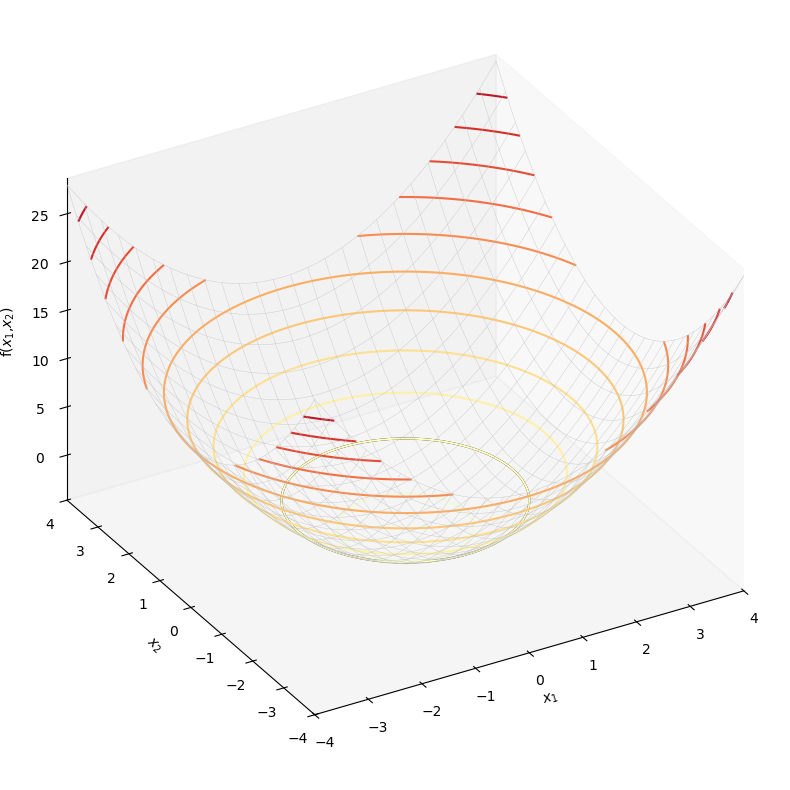

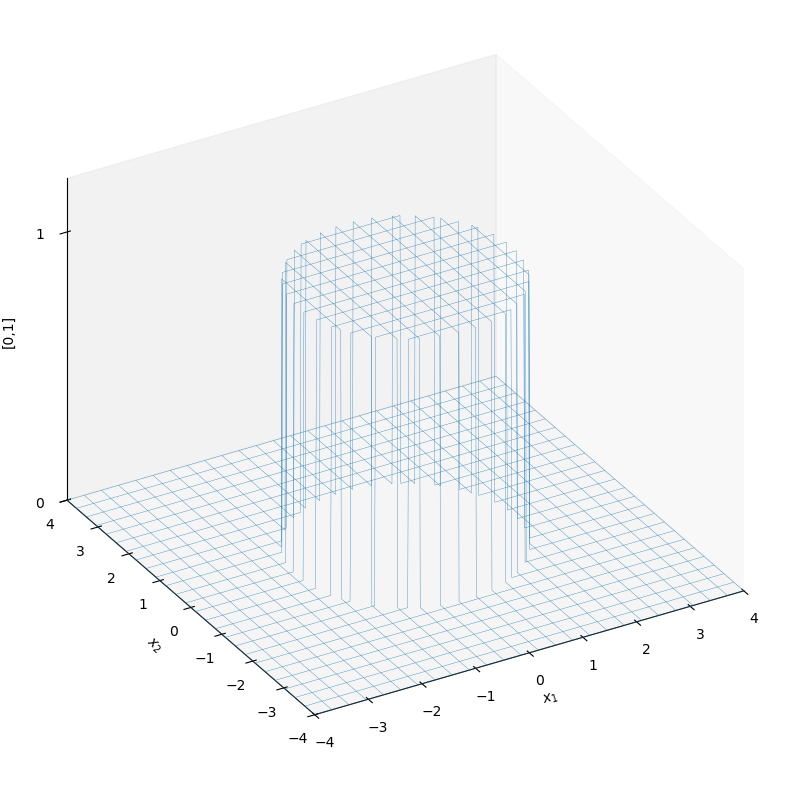

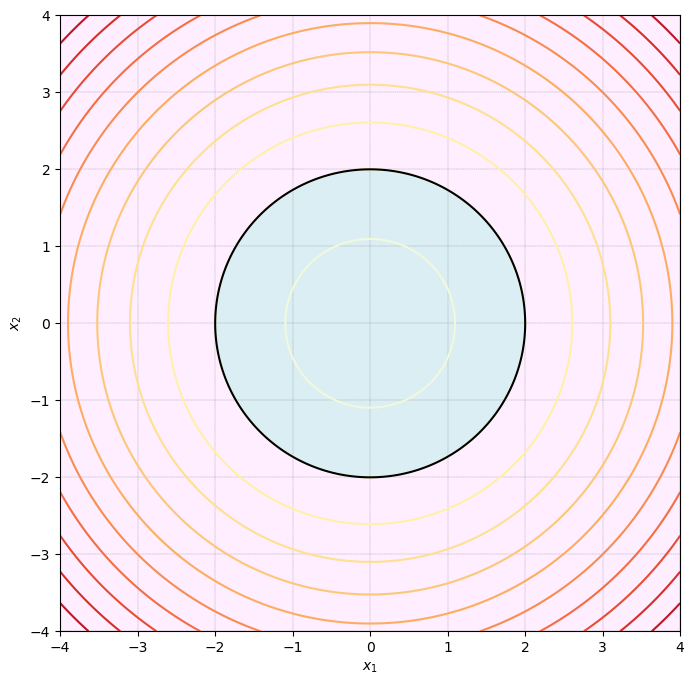

In [13]:
zz = xx**2 + yy**2 - 4  # 定义不等式区域x1**2 + x2**2 < 4
mask_less_than_0 = (zz < 0) + 0
plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)